In [1]:
import pandas as pd

In [22]:
import datetime

In [30]:
file_path = r"E:\Dropbox\Trade\DataOutput\EWZ.csv"
trade_file = f"E:\Dropbox\Trade\DataOutput\\trade_review_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}.csv"
trade_file

'E:\\Dropbox\\Trade\\DataOutput\\trade_review_20231203_003445.csv'

In [6]:
header_names = ["Ticker", "Amount", "EntryTime", "EntryPrice", "StopPrice", "ExitTime", "ExitPrice"]

df = pd.read_csv(file_path, parse_dates=["EntryTime", "ExitTime"], header=None, names=header_names)

In [19]:
df["Direction"] = "Long"
mask = df["EntryPrice"] < df["StopPrice"]
df.loc[mask, "Direction"] = "Short"
df["R"] = (df["ExitPrice"] - df["EntryPrice"]) / (df["EntryPrice"] - df["StopPrice"])

<AxesSubplot:>

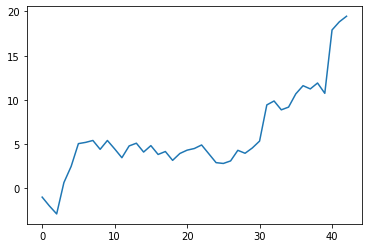

In [21]:
df["R"].cumsum().plot()

In [31]:
df.to_csv(trade_file)